In [1]:
import os
import pickle
import numpy as np
from sktime.classification.kernel_based import RocketClassifier
from utils import get_clf_report_dfs, plot_confusion_matrix

In [2]:
RANDOM_SEED=42
RESULTS_DIR="./results"
MODEL_NAME="ROCKET"

In [3]:
data = np.load('./dataset/dataset.npz')
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']
y_mapping = data['y_mapping']

In [4]:
model = RocketClassifier(use_multivariate="yes", random_state=RANDOM_SEED, num_kernels=20000) # TODO: sistema i parametri, GS?
model.fit(X_train, y_train)
file = open(os.path.join(RESULTS_DIR, f"{MODEL_NAME}.pkl"), 'wb')
pickle.dump(obj=model, file=file)
file.close()


In [5]:
y_pred = model.predict(X_test)

y_test_str = [y_mapping[label] for label in y_test]
y_pred_str = [y_mapping[label] for label in y_pred]

clf_scores_df, per_class_clf_scores_df = get_clf_report_dfs(
    y_true=y_test_str, y_pred=y_pred_str,
    clf_scores_path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_clf_scores.csv"),
    clf_per_class_scores_path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_per_class_clf_scores.csv")
)

clf_scores_df

,accuracy,f1-score macro avg,f1-score weighted avg,precision macro avg,precision weighted avg,recall macro avg,recall weighted avg
0,0.615385,0.599273,0.598435,0.644643,0.638736,0.614583,0.615385


In [6]:
per_class_clf_scores_df.style.background_gradient(cmap="Blues")

,precision,recall,f1-score,support
ball,0.000000,0.000000,0.000000,4.000000
bigball,0.666667,0.400000,0.500000,5.000000
box,0.833333,1.000000,0.909091,5.000000
button,0.500000,0.333333,0.400000,6.000000
case,1.000000,0.800000,0.888889,5.000000
cube,0.571429,0.800000,0.666667,5.000000
cylinder,0.500000,0.400000,0.444444,5.000000
jenga,1.000000,0.600000,0.750000,5.000000
labello,0.571429,0.800000,0.666667,5.000000
lemon,0.571429,0.800000,0.666667,5.000000


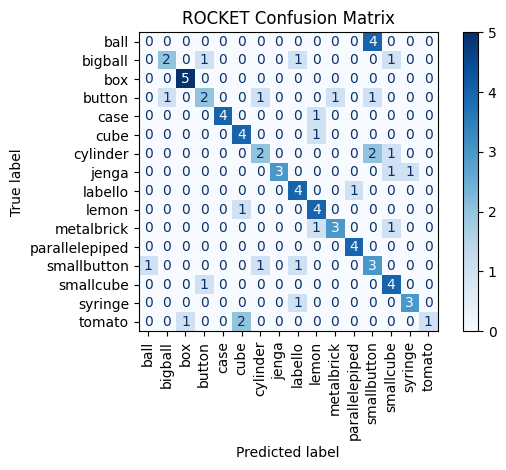

In [7]:
plot_confusion_matrix(
    y_true=y_test_str,
    y_pred=y_pred_str,
    title=f"{MODEL_NAME} Confusion Matrix",
    path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_confusion_matrix.png")
)